# BanknoteAuthentication Dataset

Responsibility : Mohamed Khaled

## Imports

In [8]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [9]:
df = pd.read_csv(
    "./AMLAss1Datasets/data_banknote_authentication.csv"
)  # Suitable for classification

##  Preprocessing
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [10]:
# Renaming the columns
df.columns = [
    "variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy", "class"
]

In [11]:
# Scaling the numerical features
scaler = StandardScaler()
df[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]] = scaler.fit_transform(
    df[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]]
)

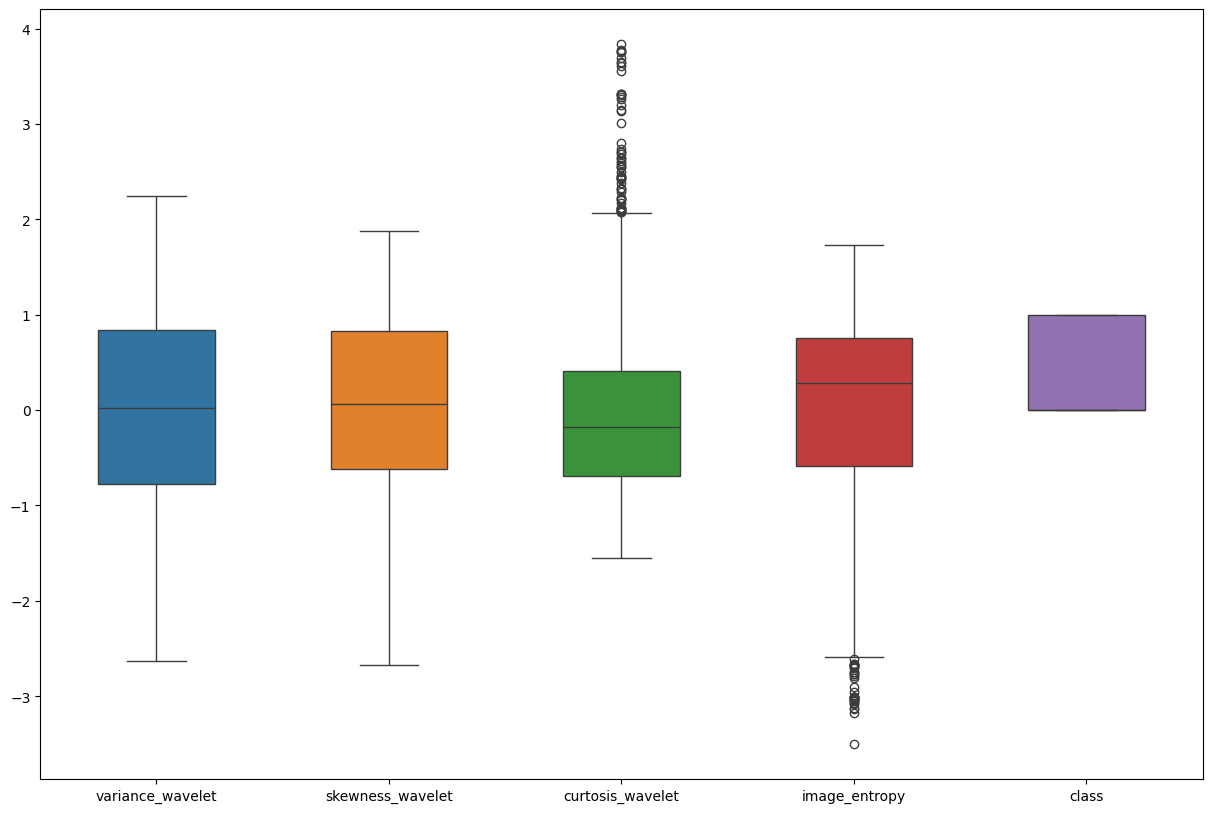

In [12]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, width=0.5)
plt.show()

In [13]:
# Removing the outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,image_entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


## Model Implementation

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

## Hyperparameter Turning

References:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html